In [1]:
# Verify installation - 
import tensorflow as tf

In [2]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.8.0
Keras Version: 2.8.0


`Tensorflow2.0 is a combination design of Tensorflow1.x and Keras. Considering user feedback and framework development over the past four years, it largely solves the above problems and will become the future machine learning platform.`

> Tensorflow 2.0 is built on the following core ideas:


* The coding is more pythonic, so that users can get the results immediately like they are programming in numpy
* Retaining the characteristics of static graphs (for performance, distributed, and production deployment), this makes TensorFlow fast, scalable, and ready for production.
* Using Keras as a high-level API for deep learning, making Tensorflow easy to use and efficient
* Make the entire framework both high-level features (easy to use, efficient, and not flexible) and low-level features (powerful and scalable, not easy to use, but very flexible)

>Eager execution is by default in TensorFlow 2.0 and, it needs no special setup.
>The following below code can be used to find out whether a CPU or GPU is in use

### GPU/CPU Check

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## A simple classifier using Keras's Sequential API

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [7]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [9]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



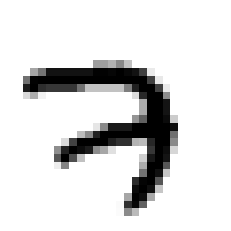

In [10]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


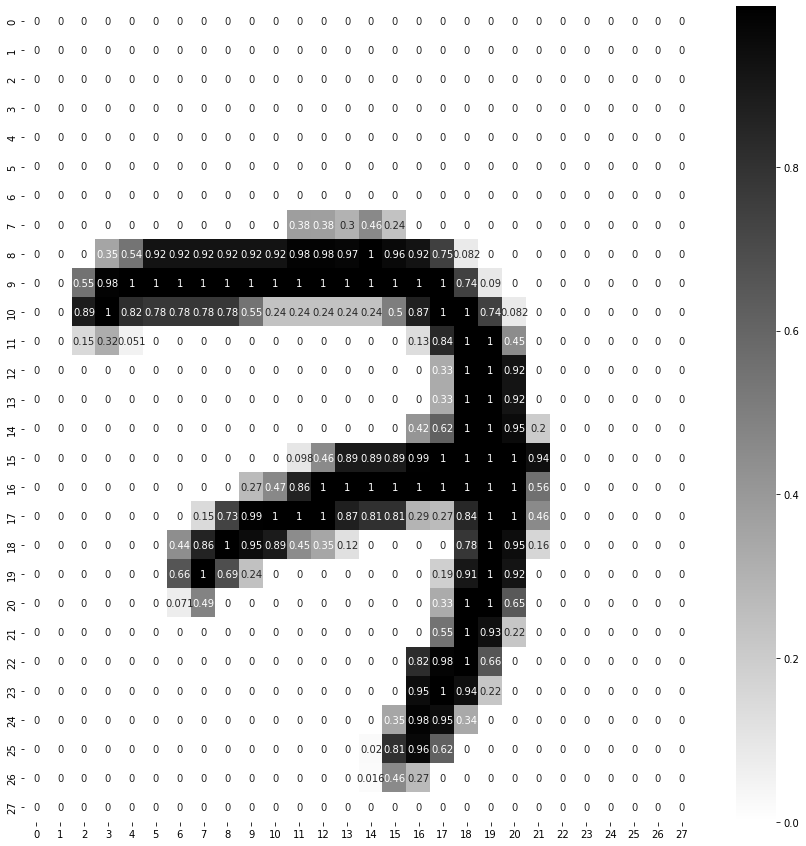

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [12]:
# actual value of y_train
y_train[0]

7

In [13]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [14]:
model_clf.layers

In [15]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [17]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [18]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [19]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [ ]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [20]:
type(hidden1.get_weights())

list

In [21]:
hidden1.get_weights()

[array([[-0.02614489, -0.03085306,  0.01047184, ..., -0.0242734 ,
          0.06270854, -0.06227776],
        [ 0.05982029,  0.04239827,  0.05322024, ...,  0.01886465,
         -0.05084884, -0.05540343],
        [ 0.00010863,  0.00989206,  0.01260968, ..., -0.02239172,
         -0.02971928, -0.05621246],
        ...,
        [-0.01067775, -0.04043164,  0.04879029, ..., -0.00576597,
          0.0531757 ,  0.00726317],
        [-0.02073901,  0.04423965, -0.02896455, ...,  0.01600885,
         -0.06916682, -0.01181903],
        [ 0.010303  , -0.02603511, -0.02318639, ..., -0.04580411,
         -0.03777638, -0.0271096 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[-0.02614489, -0.03085306,  0.01047184, ..., -0.0242734 ,
         0.06270854, -0.06227776],
       [ 0.05982029,  0.04239827,  0.05322024, ...,  0.01886465,
        -0.05084884, -0.05540343],
       [ 0.00010863,  0.00989206,  0.01260968, ..., -0.02239172,
        -0.02971928, -0.05621246],
       ...,
       [-0.01067775, -0.04043164,  0.04879029, ..., -0.00576597,
         0.0531757 ,  0.00726317],
       [-0.02073901,  0.04423965, -0.02896455, ...,  0.01600885,
        -0.06916682, -0.01181903],
       [ 0.010303  , -0.02603511, -0.02318639, ..., -0.04580411,
        -0.03777638, -0.0271096 ]], dtype=float32)

In [24]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [ ]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 1.0027 - accuracy: 0.7381 - val_loss: 0.3021 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3045 - accuracy: 0.9131 - val_loss: 0.2429 - val_accuracy: 0.9330
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2441 - accuracy: 0.9297 - val_loss: 0.2053 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2056 - accuracy: 0.9400 - val_loss: 0.1826 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1780 - accuracy: 0.9491 - val_loss: 0.1588 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1567 - accuracy: 0.9553 - val_loss: 0.1442 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1405 - accuracy: 0.9598 - val_loss: 0.1338 - val_accuracy:

In [ ]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [ ]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_05_16_01_14_36_.h5


In [ ]:
history.params


{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598195,0.846345,0.302085,0.9166
1,0.286739,0.917782,0.242876,0.9330
2,0.235610,0.932291,0.205304,0.9414
3,0.202196,0.942236,0.182553,0.9500
4,0.177123,0.949509,0.158780,0.9568
5,0.157423,0.955327,0.144199,0.9612
6,0.141312,0.959364,0.133787,0.9640
7,0.128245,0.963491,0.123556,0.9672
8,0.116761,0.967164,0.116329,0.9694
9,0.106912,0.969527,0.106637,0.9710


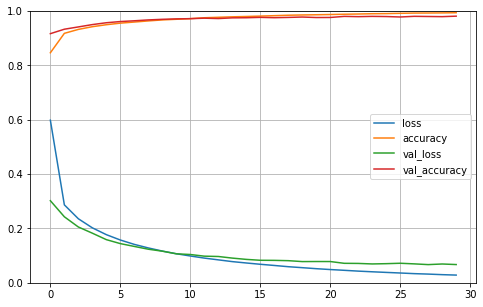

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9786


[0.07113370299339294, 0.978600025177002]

In [ ]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [ ]:
y_test_new = y_test[:3]

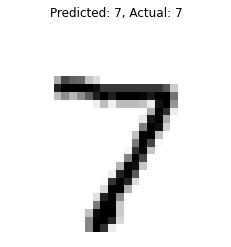

------------------------------------------------------------


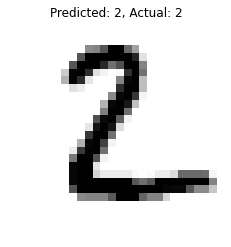

------------------------------------------------------------


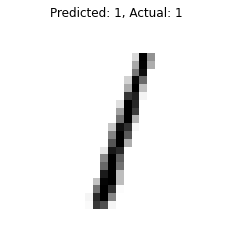

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [ ]:
weights, biases = hidden1.get_weights()


In [ ]:
weights

array([[ 0.03217652, -0.01186593, -0.03530351, ...,  0.02214805,
        -0.06490748,  0.06684271],
       [-0.01793233, -0.00472847, -0.0154996 , ...,  0.05146824,
        -0.0373642 , -0.0215263 ],
       [-0.04784323, -0.01313885,  0.01831921, ..., -0.01082107,
         0.0146363 ,  0.03396148],
       ...,
       [ 0.05102354, -0.03909116,  0.01401947, ..., -0.0445058 ,
        -0.06946859,  0.06660967],
       [-0.03026358,  0.03453741, -0.03787037, ...,  0.0221971 ,
        -0.04764985,  0.02157191],
       [ 0.05143644, -0.03870134,  0.01450481, ...,  0.05704285,
         0.07426484, -0.03019137]], dtype=float32)

In [ ]:
biases

array([ 3.45887914e-02,  1.93311777e-02,  1.62611771e-02,  1.03053562e-02,
        2.18127109e-02, -7.04615610e-04,  4.90740612e-02,  3.85399628e-03,
        9.30735748e-03, -7.21838744e-03,  3.36385635e-03, -3.51910805e-03,
        1.30453547e-02, -5.40384557e-03,  2.54492741e-02,  2.49807164e-02,
        2.16822419e-02,  9.37504414e-03,  1.40315155e-02,  2.47444026e-02,
        6.26744404e-02,  4.01330851e-02,  1.75270904e-02,  1.14477975e-02,
        7.05646630e-03,  4.45906259e-02,  3.21433991e-02,  2.44430695e-02,
       -5.63907204e-03, -1.05923954e-02, -2.33507603e-02,  2.95730382e-02,
        1.59715246e-02, -2.54293368e-03, -1.45488721e-03,  1.56615395e-03,
        4.30047512e-02, -2.40426557e-03,  2.60953475e-02, -5.67868352e-03,
        5.36454096e-02,  3.81024322e-03,  2.81242933e-02,  4.36961511e-03,
        4.46182638e-02,  4.98251915e-02,  8.13184679e-03, -6.97196200e-02,
        9.10370983e-03,  9.80966352e-03,  2.85955481e-02,  3.78530808e-02,
        4.01560590e-02, -

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>